In [143]:
import pandas as pd

df = pd.read_csv("avocado.csv", index_col=0)

df['Date'] = pd.to_datetime(df['Date'])

In [168]:


df.rename(columns={"4046": "PLU4046", "4225": "PLU4225", "4770": "PLU4770" }).head()



,Date,AveragePrice,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [145]:
# Print out of the number of unique regions and their name

print(f"{len(df['region'].unique())} unique regions")

regions = df['region'].unique()

# print(len(df['region'].unique()))

n = 1

for region in regions:
    print(str(n) + ") " + region)
    n+=1

54 unique regions
1) Albany
2) Atlanta
3) BaltimoreWashington
4) Boise
5) Boston
6) BuffaloRochester
7) California
8) Charlotte
9) Chicago
10) CincinnatiDayton
11) Columbus
12) DallasFtWorth
13) Denver
14) Detroit
15) GrandRapids
16) GreatLakes
17) HarrisburgScranton
18) HartfordSpringfield
19) Houston
20) Indianapolis
21) Jacksonville
22) LasVegas
23) LosAngeles
24) Louisville
25) MiamiFtLauderdale
26) Midsouth
27) Nashville
28) NewOrleansMobile
29) NewYork
30) Northeast
31) NorthernNewEngland
32) Orlando
33) Philadelphia
34) PhoenixTucson
35) Pittsburgh
36) Plains
37) Portland
38) RaleighGreensboro
39) RichmondNorfolk
40) Roanoke
41) Sacramento
42) SanDiego
43) SanFrancisco
44) Seattle
45) SouthCarolina
46) SouthCentral
47) Southeast
48) Spokane
49) StLouis
50) Syracuse
51) Tampa
52) TotalUS
53) West
54) WestTexNewMexico


In [146]:
groups = df.groupby("region")

groups.get_group('TotalUS').head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,conventional,2015,TotalUS
1,2015-12-20,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,conventional,2015,TotalUS
2,2015-12-13,0.93,28041335.38,9855053.66,10805838.91,1016163.17,6364279.64,4964462.13,1371440.28,28377.23,conventional,2015,TotalUS
3,2015-12-06,0.89,28800396.57,9405464.36,12160838.62,931830.63,6302262.96,5005077.36,1233956.21,63229.39,conventional,2015,TotalUS
4,2015-11-29,0.99,22617999.38,8094803.56,9003178.41,731008.41,4789009.00,3901953.04,856560.34,30495.62,conventional,2015,TotalUS


In [147]:
# Separate the data into Organic and Conventional and then create a copy of the original dataframe for the Albany region and set the date as the index

Albany_org_df = df.copy()[ df["region"] == "Albany"]
Albany_org_df = Albany_org_df[Albany_org_df['type'] == 'organic']


Albany_conv_df = df.copy()[ df["region"] == "Albany"]
Albany_conv_df = Albany_conv_df[Albany_conv_df['type'] == 'conventional']


Albany_org_df.set_index('Date', inplace=True)
Albany_conv_df.set_index('Date', inplace=True)

Albany_org_df.sort_index(inplace=True)
Albany_conv_df.sort_index(inplace=True)




In [148]:
Albany_conv_df.head(8)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany
2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany
2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany
2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany
2015-02-08,0.99,51253.97,1357.37,39111.81,163.25,10621.54,10113.10,508.44,0.0,conventional,2015,Albany
2015-02-15,1.06,41567.62,986.66,30045.51,222.42,10313.03,9979.87,333.16,0.0,conventional,2015,Albany
2015-02-22,1.07,45675.05,1088.38,35056.13,151.00,9379.54,9000.16,379.38,0.0,conventional,2015,Albany


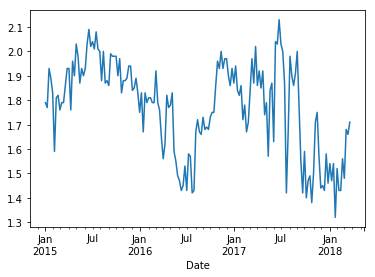

In [122]:
Albany_org_df['AveragePrice'].plot()


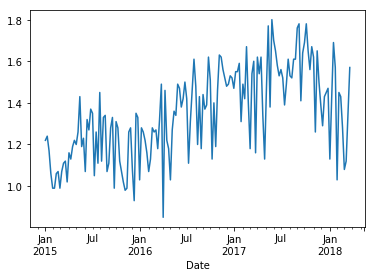

In [123]:
Albany_conv_df['AveragePrice'].plot()

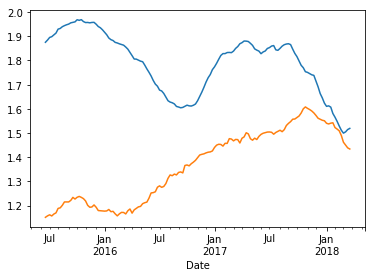

In [124]:
# Rolling 25 data point average for Organic and Conventional avocados

Albany_org_df['AveragePrice'].rolling(25).mean().plot()


Albany_conv_df['AveragePrice'].rolling(25).mean().plot()

In [151]:
# Add the 25 point moving average into the dataframe

Albany_org_df['Price25MA'] = Albany_org_df['AveragePrice'].rolling(25).mean()

Albany_conv_df['Price25MA'] = Albany_conv_df['AveragePrice'].rolling(25).mean()



Albany_org_df.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Price25MA
Date,,,,,,,,,,,,,
2018-02-25,1.56,5356.63,816.56,532.59,0.0,4007.48,4007.48,0.00,0.0,organic,2018,Albany,1.5112
2018-03-04,1.48,3851.30,311.55,296.77,0.0,3242.98,3239.65,3.33,0.0,organic,2018,Albany,1.4992
2018-03-11,1.68,2570.52,131.67,229.56,0.0,2209.29,2209.29,0.00,0.0,organic,2018,Albany,1.5044
2018-03-18,1.66,3154.45,275.89,297.96,0.0,2580.60,2577.27,3.33,0.0,organic,2018,Albany,1.5140
2018-03-25,1.71,2321.82,42.95,272.41,0.0,2006.46,1996.46,10.00,0.0,organic,2018,Albany,1.5188


In [152]:
# NOTE: No longer needed after using index_col=0 in the csv import
# Albany_df.drop(Albany_df.columns[0],axis=1,inplace=True)


In [159]:

org_df = df.copy()[df['type']== 'organic']


conv_df = df.copy()[df['type']== 'conventional']



graph_df = pd.DataFrame()

for region in org_df['region'].unique():
    print(region)
    region_df = org_df.copy()[org_df['region']==region]
    region_df.set_index('Date', inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f"{region}_price25ma"] = region_df["AveragePrice"].rolling(25).mean()

    if graph_df.empty:
        graph_df = region_df[[f"{region}_price25ma"]]  # note the double square brackets!
    else:
        graph_df = graph_df.join(region_df[f"{region}_price25ma"])

Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes
HarrisburgScranton
HartfordSpringfield
Houston
Indianapolis
Jacksonville
LasVegas
LosAngeles
Louisville
MiamiFtLauderdale
Midsouth
Nashville
NewOrleansMobile
NewYork
Northeast
NorthernNewEngland
Orlando
Philadelphia
PhoenixTucson
Pittsburgh
Plains
Portland
RaleighGreensboro
RichmondNorfolk
Roanoke
Sacramento
SanDiego
SanFrancisco
Seattle
SouthCarolina
SouthCentral
Southeast
Spokane
StLouis
Syracuse
Tampa
TotalUS
West
WestTexNewMexico


In [166]:
# Drop the NaN values (the first 25 values of each column)

graph_df.dropna().head()


,Albany_price25ma,Atlanta_price25ma,BaltimoreWashington_price25ma,Boise_price25ma,Boston_price25ma,BuffaloRochester_price25ma,California_price25ma,Charlotte_price25ma,Chicago_price25ma,CincinnatiDayton_price25ma,...,SouthCarolina_price25ma,SouthCentral_price25ma,Southeast_price25ma,Spokane_price25ma,StLouis_price25ma,Syracuse_price25ma,Tampa_price25ma,TotalUS_price25ma,West_price25ma,WestTexNewMexico_price25ma
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-21,1.8748,1.6732,1.5228,1.6488,1.9232,1.7328,1.4280,1.9992,1.6832,1.3244,...,1.8316,1.3828,1.7100,1.5884,1.9268,1.7476,1.6708,1.5164,1.4792,1.6388
2015-06-28,1.8840,1.6584,1.5392,1.6464,1.9312,1.7368,1.4452,2.0000,1.6908,1.3304,...,1.8332,1.3828,1.7096,1.6008,1.9348,1.7532,1.6752,1.5236,1.4868,1.6364
2015-07-05,1.8948,1.6448,1.5580,1.6760,1.9388,1.7496,1.4680,1.9948,1.6860,1.3412,...,1.8244,1.3808,1.7052,1.6196,1.9356,1.7604,1.6776,1.5068,1.4996,1.6320
2015-07-12,1.8980,1.6344,1.5696,1.7004,1.9464,1.7648,1.4904,1.9940,1.6800,1.3488,...,1.8208,1.3808,1.7024,1.6448,1.9356,1.7688,1.6736,1.4900,1.5188,1.6420
2015-07-19,1.9056,1.6112,1.5856,1.6856,1.9480,1.7772,1.5140,1.9844,1.6728,1.3648,...,1.8120,1.3784,1.6912,1.6404,1.9328,1.7808,1.6604,1.4688,1.5204,1.6464
